In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [12]:
educ = pd.read_excel("data/histtab-A-01.xlsx")
educ_counts = educ.iloc[10:71, 2:10]
educ_counts.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
10,2016.0,215015,2414,7078,13961,62002,57660,71900
11,2015.0,212132,2601,7295,14686,62575,56031,68945
12,2014.0,209287,2525,7388,14545,62240,55709,66879
13,2013.0,206899,2344,7578,14595,61704,55173,65506
14,2012.0,204579,2484,7800,14993,62113,53900,63291


In [23]:
educ_counts.columns = [
    "Year",
    "Total",
    "Elem 0-4",
    "Elem 5-8",
    "HS 1-3",
    "High school",
    "Some college",
    "College degree",
]
educ_counts.columns, educ_counts.dtypes

(Index(['Year', 'Total', 'Elem 0-4', 'Elem 5-8', 'HS 1-3', 'High school',
        'Some college', 'College degree'],
       dtype='object'), '\n', Year              float64
 Total               int64
 Elem 0-4            int64
 Elem 5-8            int64
 HS 1-3              int64
 High school         int64
 Some college        int64
 College degree      int64
 dtype: object)

#### pd.to_numeric conerts to float64 or int64

In [32]:
educ_counts = educ_counts[educ_counts.columns].apply(pd.to_numeric)

# to convert year(float64) to int64
educ_counts["Year"] = educ_counts["Year"].astype("int64")
educ_counts.dtypes

Year                     int64
Total                    int64
Elem 0-4                 int64
Elem 5-8                 int64
HS 1-3                   int64
High school              int64
Some college             int64
College degree           int64
less than high school    int64
dtype: object

In [33]:
educ_counts["less than high school"] = (
    educ_counts["Elem 0-4"] + educ_counts["Elem 5-8"] + educ_counts["HS 1-3"]
)
educ_counts.head()

,Year,Total,Elem 0-4,Elem 5-8,HS 1-3,High school,Some college,College degree,less than high school
10,2016,215015,2414,7078,13961,62002,57660,71900,23453
11,2015,212132,2601,7295,14686,62575,56031,68945,24582
12,2014,209287,2525,7388,14545,62240,55709,66879,24458
13,2013,206899,2344,7578,14595,61704,55173,65506,24517
14,2012,204579,2484,7800,14993,62113,53900,63291,25277


In [35]:
educ_long = educ_counts.melt(
    id_vars=["Year", "Total"],
    value_vars=[
        "High school",
        "Some college",
        "College degree",
        "less than high school",
    ],
    value_name="Number",
    var_name="Education",
)
educ_long.head(), educ_long["Education"].unique()

(   Year   Total    Education  Number
 0  2016  215015  High school   62002
 1  2015  212132  High school   62575
 2  2014  209287  High school   62240
 3  2013  206899  High school   61704
 4  2012  204579  High school   62113,
 array(['High school', 'Some college', 'College degree',
        'less than high school'], dtype=object))

In [37]:
educ_long["percentile"] = educ_long["Number"] * 100 / educ_long["Total"]
pd.Categorical(
    educ_long["Education"],
    ["less than high school", "High school", "Some college", "College degree"],
)
educ_long.head()

,Year,Total,Education,Number,percentile
0,2016,215015,High school,62002,28.836128
1,2015,212132,High school,62575,29.498143
2,2014,209287,High school,62240,29.739066
3,2013,206899,High school,61704,29.823247
4,2012,204579,High school,62113,30.361376


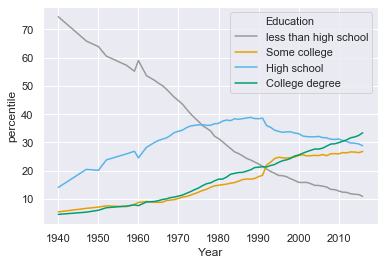

In [53]:
cb_palette = [
    "#999999",
    "#E69F00",
    "#56B4E9",
    "#009E73",
    "#F0E442",
    "#0072B2",
    "#D55E00",
    "#CC79A7",
]
sns.set_palette(cb_palette)
sns.lineplot(
    x="Year",
    y="percentile",
    estimator=None,
    hue="Education",
    #    palette=cb_palette,
    data=educ_long.sort_values("Education", ascending=False),
)

#### Alternate way without sorting

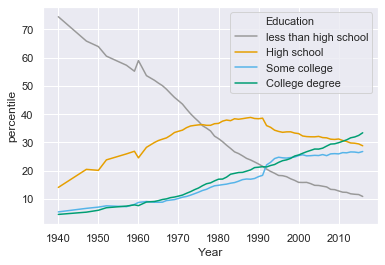

In [59]:
sns.lineplot(
    x="Year",
    y="percentile",
    estimator=None,
    hue="Education",
    data=educ_long,
    hue_order=[
        "less than high school",
        "High school",
        "Some college",
        "College degree",
    ],
)

#### Area fill plot

In [80]:
educ_area_plot = educ_counts.copy()
educ_area_plot.drop(columns=['Elem 0-4', 'Elem 5-8', 'HS 1-3'], inplace=True)
educ_area_plot['High school'] = educ_counts['High school'] / educ_counts['Total'] * 100
educ_area_plot['Some college'] = educ_counts['Some college'] / educ_counts['Total'] * 100
educ_area_plot['less than high school'] = educ_counts['less than high school'] / educ_counts['Total'] * 100
educ_area_plot['College degree'] = educ_counts['College degree'] / educ_counts['Total'] * 100
educ_area_plot.drop(columns=['Total'], inplace=True)
educ_area_plot.head()

,Year,Total,High school,Some college,College degree,less than high school
10,2016,215015,28.836128,26.816734,33.439527,10.907611
11,2015,212132,29.498143,26.413271,32.500990,11.588068
12,2014,209287,29.739066,26.618471,31.955640,11.686345
13,2013,206899,29.823247,26.666634,31.660859,11.849743
14,2012,204579,30.361376,26.346790,30.937193,12.355618


(1960, 2016)

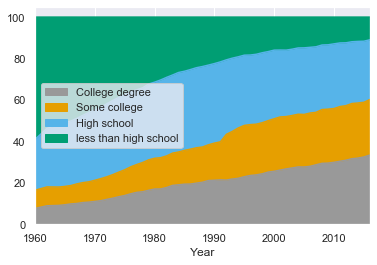

In [95]:
educ_area_plot[['Year', "College degree", "Some college", "High school", "less than high school"]].plot.area(x='Year')
plt.xlim(1960, 2016)

#### Trivariate Data

In [96]:
ethanol = pd.read_excel('data/Ethanol.xlsx')
ethanol.describe()

,NOx,C,E
count,88.000000,88.000000,88.000000
mean,1.957375,12.034091,0.926477
std,1.132710,3.932473,0.203569
min,0.370000,7.500000,0.535000
25%,0.953000,8.625000,0.761750
50%,1.754500,12.000000,0.932000
75%,3.003000,15.000000,1.109750
max,4.028000,18.000000,1.232000


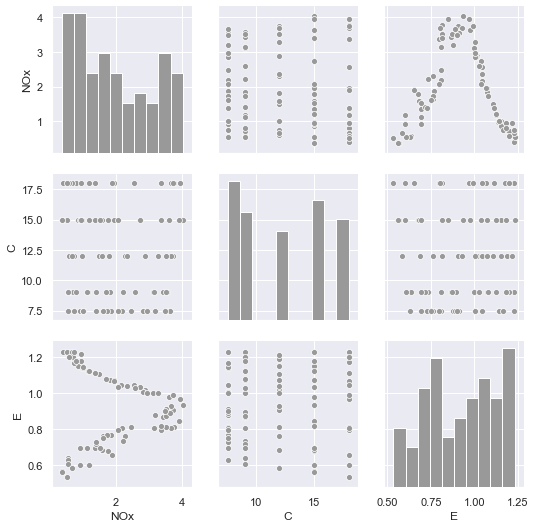

In [97]:
sns.pairplot(ethanol)

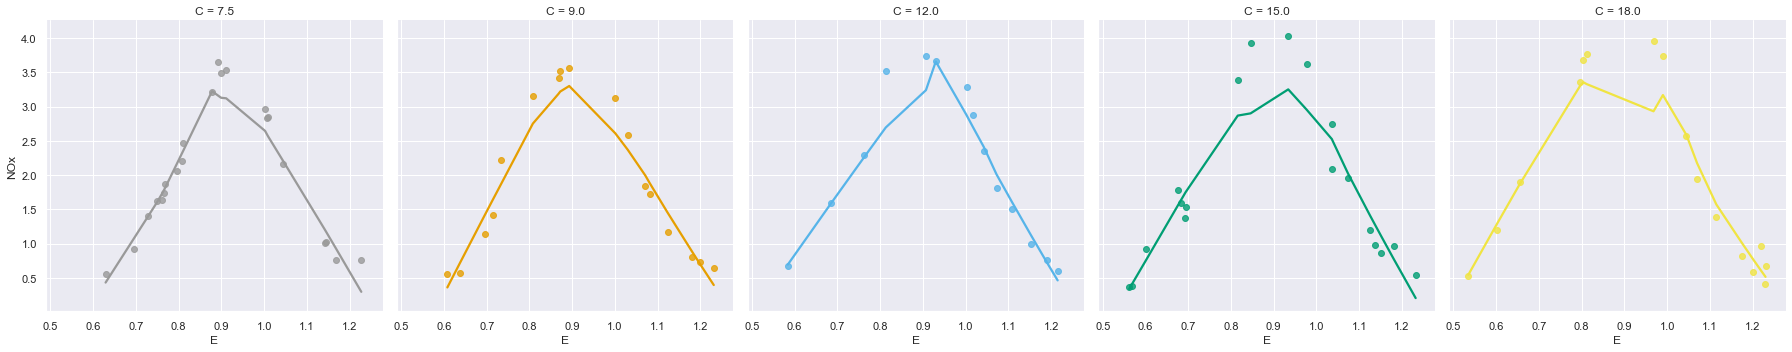

In [106]:
# g = sns.FacetGrid(data=ethanol, col="C", col_wrap=5)
# g.map(sns.lmplot, x='E', y='NOx')
sns.lmplot(x='E', y='NOx', hue='C', data=ethanol, col='C', lowess=True)

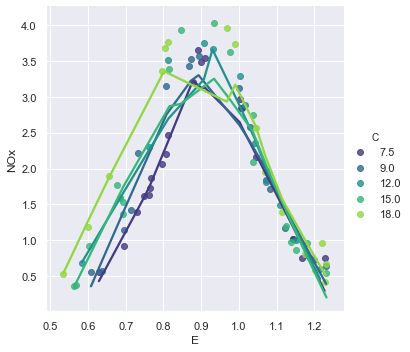

In [112]:
sns.lmplot(x='E', y='NOx', hue='C', data=ethanol, lowess=True, palette='viridis')

#### custom cut for facetgrid

In [121]:
ethanol['E_Category'] = pd.cut(ethanol['E'], 6, labels=['E1', 'E2', 'E3', 'E4', 'E5', 'E6'])
ethanol.head()

,NOx,C,E,E_Category
0,3.741,12.0,0.907,E4
1,2.295,12.0,0.761,E2
2,1.498,12.0,1.108,E5
3,2.881,12.0,1.016,E5
4,0.760,12.0,1.189,E6


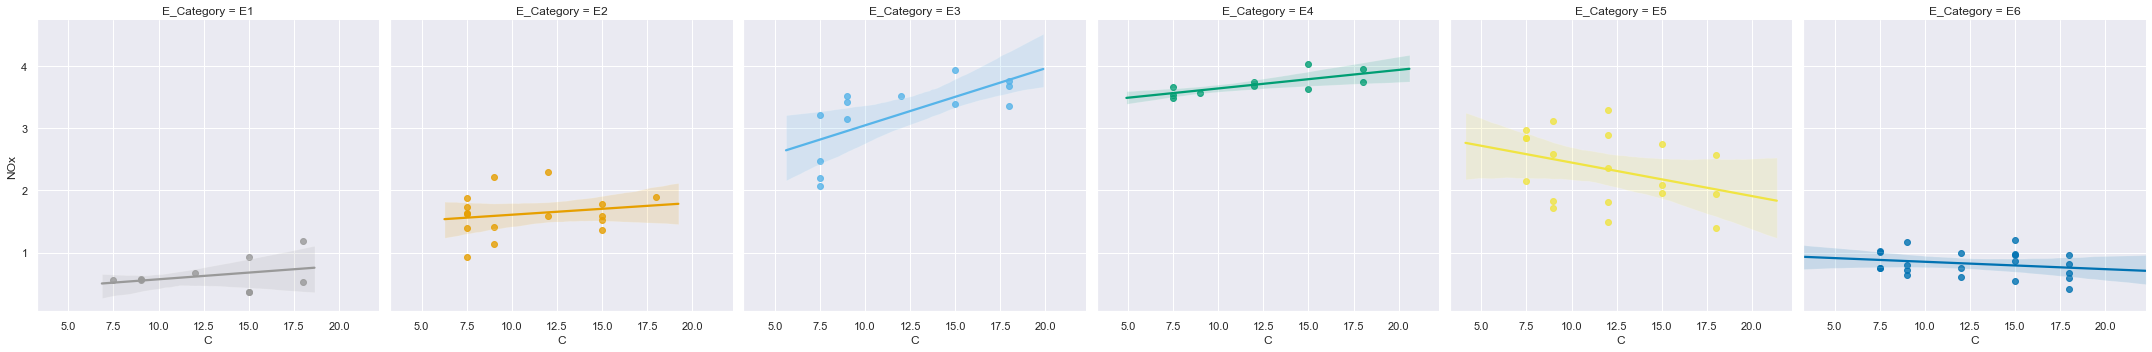

In [127]:
sns.lmplot(x='C', y='NOx', hue='E_Category', data=ethanol, fit_reg=True, col='E_Category')